**Brian Blaylock**  
*July 20, 2021*

# HRRR Data

This tutorial shows you how to download HRRR data from Amazon (and other sources) with the Herbie Python package.

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [2]:
H = Herbie("2021-07-19", model="hrrr", product="sfc")


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Jul-19 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
ds = H.xarray("TMP:2 m above")
ds

👨🏻‍🏭 Created directory: [C:\Users\blayl_depgywe\data\hrrr\20210719]


C:\Users\blayl_depgywe\BB_python\Herbie\herbie\archive.py:980: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2021-07-19
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2021-07-19
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 295.3 295.3 295.3 ... 287.8 287.7 287.6
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\blayl_depgywe\data\hrrr\20210719\subset...
    searchString:            TMP:2 m above

Text(1.0, 1.0, '2 metre temperature')

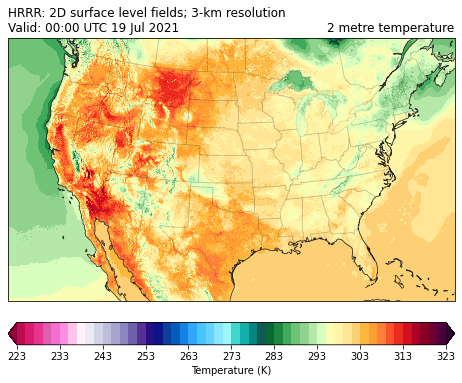

In [4]:
ax = common_features("50m", crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")
